In [24]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy import constants as const
import astropy.units as u
from astropy.coordinates import SkyCoord
# from scipy.misc import imread
# import matplotlib.cbook as cbook

%matplotlib inline

In [25]:
LCC = Table.read('LCC_1.csv', format = 'ascii', data_start = 0, fast_reader = True)
UCL = Table.read('UCL_1.csv', format = 'ascii', data_start = 0, fast_reader = True)
US  = Table.read('US_1.csv', format = 'ascii', data_start = 0, fast_reader = True)

LCC_3 = Table.read('LCC_3.csv', format = 'ascii', data_start = 0, fast_reader = True)
UCL_3 = Table.read('UCL_3.csv', format = 'ascii', data_start = 0, fast_reader = True)
US_3  = Table.read('US_3.csv', format = 'ascii', data_start = 0, fast_reader = True)

Photometry_20  = Table.read('Synthetic_Photometry_20Myrs.dat', format = 'ascii', data_start = 0, fast_reader = True)
Photometry_15  = Table.read('Synthetic_Photometry_15Myrs.dat', format = 'ascii', data_start = 0, fast_reader = True)
Photometry_30  = Table.read('Synthetic_Photometry_30Myrs.dat', format = 'ascii', data_start = 0, fast_reader = True)
Photometry_60  = Table.read('Synthetic_Photometry_60Myrs.dat', format = 'ascii', data_start = 0, fast_reader = True)

#The SQL cuts in longitude and latitude were taken from Zeeuw et al. 1999 paper
#The ones shown by Wright et al. 2018 are slightly different and were taken from Rizzuto et al. 2011
#but it is a book and I cannot have find it online. 

# LCC - Gaia SQL Query
'''
SELECT gaia.source_id, gaia.ra, gaia.ra_error, gaia.dec, gaia.dec_error, gaia.parallax, gaia.parallax_error, gaia.l, gaia.b
FROM gaiadr1.gaia_source AS gaia
WHERE gaia.parallax >= 6.66 AND gaia.parallax <= 10 AND gaia.b >= -10 AND gaia.b <= 16 AND gaia.l >= 285 AND gaia.l <= 313
'''

# UCL - Gaia SQL Query
'''
SELECT gaia.source_id, gaia.ra, gaia.ra_error, gaia.dec, gaia.dec_error, gaia.parallax, gaia.parallax_error, gaia.l, gaia.b
FROM gaiadr1.gaia_source AS gaia
WHERE gaia.parallax >= 6.66 AND gaia.parallax <= 10 AND gaia.b >= 5 AND gaia.b <= 31 AND gaia.l >= 313 AND gaia.l <= 337
'''

# US - Gaia SQL Query
'''
SELECT gaia.source_id, gaia.ra, gaia.ra_error, gaia.dec, gaia.dec_error, gaia.parallax, gaia.parallax_error, gaia.l, gaia.b
FROM gaiadr1.gaia_source AS gaia
WHERE gaia.parallax >= 6.66 AND gaia.parallax <= 10 AND gaia.b >= 7 AND gaia.b <= 32 AND gaia.l >= 337 AND gaia.l <= 360
'''

'\nSELECT gaia.source_id, gaia.ra, gaia.ra_error, gaia.dec, gaia.dec_error, gaia.parallax, gaia.parallax_error, gaia.l, gaia.b\nFROM gaiadr1.gaia_source AS gaia\nWHERE gaia.parallax >= 6.66 AND gaia.parallax <= 10 AND gaia.b >= 7 AND gaia.b <= 32 AND gaia.l >= 337 AND gaia.l <= 360\n'

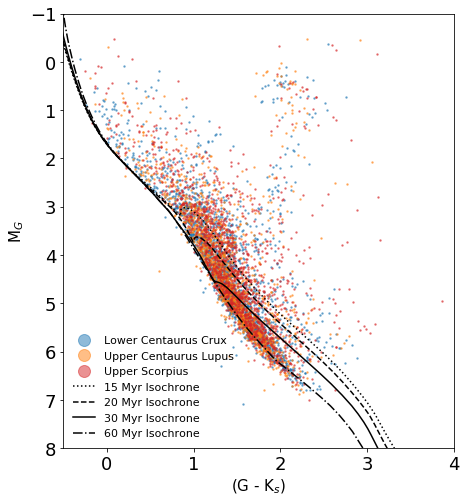

In [44]:
plt.figure(figsize = (7, 8))
plt.plot(LCC_3["g_min_ks"], LCC_3["g_mag_abs"], 'o', c = 'C0', markersize = 1.5, alpha = 0.5)
plt.plot(UCL_3["g_min_ks"], UCL_3["g_mag_abs"], 'o', c = 'C1', markersize = 1.5, alpha = 0.5)
plt.plot(US_3["g_min_ks"], US_3["g_mag_abs"], 'o', c = 'C3', markersize = 1.5, alpha = 0.5)
plt.plot(Photometry_15["col23"] - Photometry_15["col17"], Photometry_15["col23"], ':', color = 'k')
plt.plot(Photometry_20["col23"] - Photometry_20["col17"], Photometry_20["col23"], '--', color = 'k')
plt.plot(Photometry_30["col23"] - Photometry_30["col17"], Photometry_30["col23"], '-', color = 'k')
plt.plot(Photometry_60["col23"] - Photometry_60["col17"], Photometry_60["col23"], '-.', color = 'k')
plt.legend(['Lower Centaurus Crux', 'Upper Centaurus Lupus', 'Upper Scorpius', \
           '15 Myr Isochrone', '20 Myr Isochrone', '30 Myr Isochrone', '60 Myr Isochrone'], frameon = False, prop = {'size': 11}, markerscale = 8)
plt.ylim(8, -1)
plt.xlim(-0.5,4)
plt.xlabel(r'(G - K$_s$)', size = 15)
plt.ylabel(r'M$_G$', size = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)

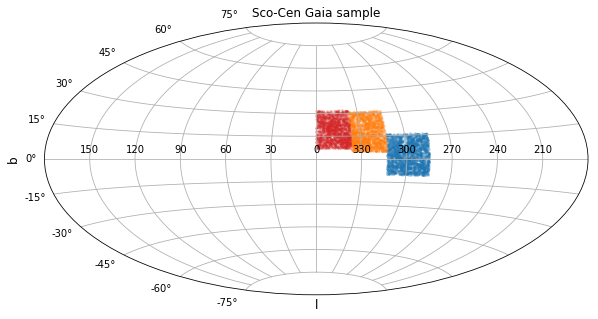

In [153]:
def plot_mwd(RA, Dec, RA_1, Dec_1, RA_2, Dec_2, org = 0, title = 'Mollweide projection', projection = 'aitoff'):
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    '''
    x       = np.remainder(RA + 360 - org, 360) # shift RA values
    ind     = x > 180
    x[ind] -= 360                               # scale conversion to [-180, 180]
    x       = -x                                # reverse the scale: East to the left
    
    y       = np.remainder(RA_1 + 360 - org, 360) # shift RA values
    ind     = y > 180
    y[ind] -= 360                               # scale conversion to [-180, 180]
    y       = -y                                # reverse the scale: East to the left
    
    z       = np.remainder(RA_2 + 360 - org, 360) # shift RA values
    ind     = z > 180
    z[ind] -= 360                               # scale conversion to [-180, 180]
    z       = -z                                # reverse the scale: East to the left
    
#     tick_labels = np.array([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150])
    tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
    tick_labels = np.remainder(tick_labels + 360 + org, 360)
    
    fig = plt.figure(figsize = (10, 5))
    ax = fig.add_subplot(111, projection = projection)
#     ax = fig.add_subplot(111, projection = projection, axisbg = 'LightCyan')

    ax.scatter(np.radians(x),np.radians(Dec), c = 'C0', s = 3, alpha = 0.2)  # convert degrees to radians
    ax.scatter(np.radians(y),np.radians(Dec_1), c = 'C1', s = 3, alpha = 0.2)  # convert degrees to radians
    ax.scatter(np.radians(z),np.radians(Dec_2), c = 'C3', s = 3, alpha = 0.2)  # convert degrees to radians

    ax.set_xticklabels(tick_labels)     # we add the scale on the x axis
    ax.set_title("Sco-Cen Gaia sample")
    ax.title.set_fontsize(12)
    ax.set_xlabel("l")
    ax.xaxis.label.set_fontsize(12)
    ax.set_ylabel("b")
    ax.yaxis.label.set_fontsize(12)
    ax.grid(True)

l_1  = LCC["l"]
b_1  = LCC["b"]

l_2  = UCL["l"]
b_2  = UCL["b"]

l_3  = US["l"]
b_3  = US["b"]

plot_mwd(l_1, b_1, l_2, b_2, l_3, b_3, org = 0)
plt.savefig("Sco_Cen_Projection_flipped.png", dpi = 300)

In [154]:
#Data is passed with units
#Coordinates are transformed into an astropy.coordinates SkyCoord object
#Coordinates in radians for matplotlib

l_1  = LCC["l"] * u.degree
b_1  = LCC["b"] * u.degree

LCC = SkyCoord(ra = l_1, dec = b_1, frame = 'icrs')

l_rad_1  = LCC.ra.wrap_at(180 * u.deg).radian
b_rad_1  = LCC.dec.radian

l_2  = UCL["l"] * u.degree
b_2  = UCL["b"] * u.degree

UCL = SkyCoord(ra = l_2, dec = b_2, frame = 'icrs')

l_rad_2  = UCL.ra.wrap_at(180 * u.deg).radian
b_rad_2  = UCL.dec.radian

l_3  = US["l"] * u.degree
b_3  = US["b"] * u.degree

US = SkyCoord(ra = l_3, dec = b_3, frame = 'icrs')

l_rad_3  = US.ra.wrap_at(180 * u.deg).radian
b_rad_3  = US.dec.radian

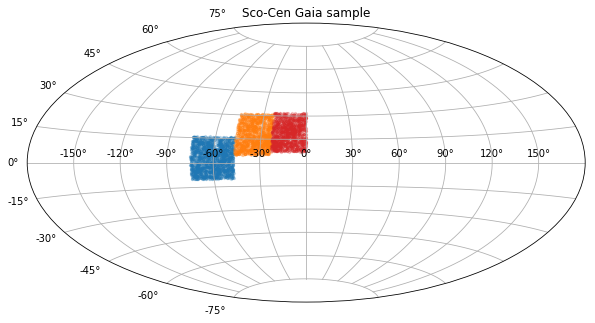

In [155]:
plt.figure(figsize = (10,5))
plt.subplot(111, projection = "aitoff")
plt.title("Sco-Cen Gaia sample")
plt.grid(True)
# plt.plot(l_rad, b_rad, 'o', markersize = 3, alpha = 0.2)
# plt.plot(l_rad_2, b_rad_2, 'o', markersize = 3, alpha = 0.2)
# plt.plot(l_rad_3, b_rad_3, 'o', markersize = 3, alpha = 0.2)
plt.scatter(l_rad_1, b_rad_1,  c = 'C0',s = 5, alpha = 0.2)
plt.scatter(l_rad_2, b_rad_2,  c = 'C1',s = 5, alpha = 0.2)
plt.scatter(l_rad_3, b_rad_3,  c = 'C3',s = 5, alpha = 0.2)
plt.subplots_adjust(top = 0.95, bottom = 0.0)

plt.savefig("Sco_Cen_Projection.png", dpi = 300)

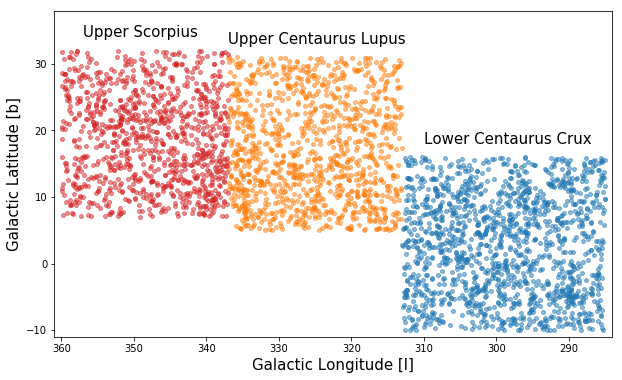

In [156]:
LCC = Table.read('LCC.csv', format = 'ascii', data_start = 0, fast_reader = True)
UCL = Table.read('UCL.csv', format = 'ascii', data_start = 0, fast_reader = True)
US  = Table.read('US.csv', format = 'ascii', data_start = 0, fast_reader = True)

plt.figure(figsize = (10,6))

# img = imread('Exoplanets.jpg')
# plt.imshow(img, zorder = 0)

plt.plot(LCC["l"], LCC["b"], 'o', c = 'C0', markersize = 4, alpha = 0.5)
plt.plot(UCL["l"], UCL["b"], 'o', c = 'C1', markersize = 4, alpha = 0.5)
plt.plot(US["l"], US["b"], 'o', c = 'C3', markersize = 4, alpha = 0.5)
plt.text(357, 34, 'Upper Scorpius', size = 15)
plt.text(337, 33, 'Upper Centaurus Lupus', size = 15)
plt.text(310, 18, 'Lower Centaurus Crux', size = 15)
plt.xlim(361, 284)
plt.ylim(-11, 38)
plt.xlabel("Galactic Longitude [l]", size = 15)
plt.ylabel("Galactic Latitude [b]", size = 15)

plt.savefig("Sco_Cen.png", dpi = 300)